In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image

In [2]:
annotation = pd.read_csv('annotation.csv', header=None)
annotation = annotation.rename(columns={0: 'image_name', 1: 'label'})

In [3]:
print(annotation['label'].value_counts())

print(len(annotation))

noncyberbullying    14650
cyberbullying        5201
Name: label, dtype: int64
19851


In [4]:
5201*2

10402

In [5]:
import time

#number_of_sample =  5000

number_of_sample =  10402

#problematic =[1021,1302,6400,6414,3044] #1302 has large number of pixels

#number_of_sample =  len(annotation) - len(problematic)

number_of_sample =  len(annotation) 


train_image = []

start_time = time.time()

for i in range(number_of_sample):
    #print(i)
    #img = image.load_img('C:/5153/images/' + annotation.iloc[i, 0], target_size=(150,150))
    img = image.load_img('C:/5153/images/' + annotation.iloc[i, 0], target_size=(100,100))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
print("--- %s seconds ---" % (time.time() - start_time))
#print('there are {} items'.format(len(images)))

D:\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
D:\anaconda3\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (113027596 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
D:\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
D:\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


--- 274.33602237701416 seconds ---


In [6]:
# start_time = time.time()

# for i in range(number_of_sample):

#     img = image.load_img('C:/5153/images/' + annotation.iloc[-i, 0], target_size=(150,150))
#     img = image.img_to_array(img)
#     img = img/255
#     train_image.append(img)
    
# print("--- %s seconds ---" % (time.time() - start_time))


In [7]:
df = annotation.copy()
# df_sample_bully = df.iloc[0:number_of_sample]
# df_sample_nonbully = df.iloc[-number_of_sample:]
# df_sample = pd.concat([df_sample_bully, df_sample_nonbully])

df2=df.iloc[0:number_of_sample]

df_sample = df2

In [8]:
print(number_of_sample)
print(len(df2))

19851
19851


In [9]:
X = np.array(train_image)
y = np.array(df_sample['label'])

le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
annotation

,image_name,label
0,aa821d8a6eab4298984a5246ae366c69.jpg,cyberbullying
1,5e6dfd8c3775459ab3bd1cbf5c219580.jpg,cyberbullying
2,78daf63bcb214012ba57e001717455f5.jpg,cyberbullying
3,17209b894b0443a2ac87ba6943fc543e.JPEG,cyberbullying
4,15d4044b026440d7a7245332c40be3e8.JPEG,cyberbullying
...,...,...
19846,626c6a55e1bf487ca4328496a7bc4eec.jpg,noncyberbullying
19847,7fd8801ae4e2404392de7818a12232a8.jpg,noncyberbullying
19848,7b4ab64f4b1c4b73a2ac1f332fd72fff.jpg,noncyberbullying
19849,24ef1c62985d4f4caff2e2d18697c674.jpg,noncyberbullying


In [11]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
print(len(X))
print(len(y))

19851
19851


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

keras.backend.clear_session()


model = Sequential()
#model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(150,150,3)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)        0

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

#history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64, callbacks=callback)

start_time = time.time()

#history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=200, callbacks=callback)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=50, callbacks=callback)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
318/318 [==============================] - 8s 19ms/step - loss: 0.5544 - accuracy: 0.7363 - val_loss: 0.5223 - val_accuracy: 0.7409
Epoch 2/50
318/318 [==============================] - 5s 16ms/step - loss: 0.5396 - accuracy: 0.7373 - val_loss: 0.5232 - val_accuracy: 0.7409
Epoch 3/50
318/318 [==============================] - 5s 16ms/step - loss: 0.5275 - accuracy: 0.7369 - val_loss: 0.5023 - val_accuracy: 0.7409
Epoch 4/50
318/318 [==============================] - 5s 16ms/step - loss: 0.5097 - accuracy: 0.7428 - val_loss: 0.5062 - val_accuracy: 0.7628
Epoch 5/50
318/318 [==============================] - 5s 16ms/step - loss: 0.5019 - accuracy: 0.7478 - val_loss: 0.4795 - val_accuracy: 0.7628
Epoch 6/50
318/318 [==============================] - 5s 16ms/step - loss: 0.4917 - accuracy: 0.7533 - val_loss: 0.4863 - val_accuracy: 0.7706
Epoch 7/50
318/318 [==============================] - 5s 16ms/step - loss: 0.4847 - accuracy: 0.7589 - val_loss: 0.5146 - val_accuracy: 0.7668

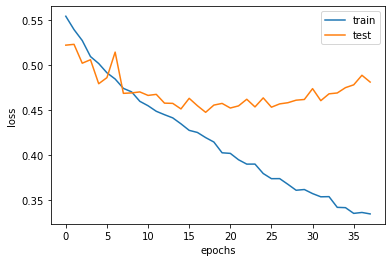

In [17]:
#fig = plt.subplots(figsize=(15,8))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();
plt.savefig('valloss.pdf')

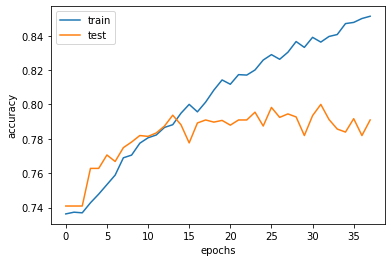

In [18]:
#plot the accuracy thing

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();
plt.savefig('accuracy_epoch.pdf')

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred2=[]
for i in range(len(np.ravel(y_pred))):
    y_pred2.append(round(np.ravel(y_pred)[i]))

In [21]:
y_pred2

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [22]:
from sklearn.metrics import confusion_matrix

CM=confusion_matrix(y_test, y_pred2)/len(y_test)

#row is true, column is predicted

accuracy = CM[0,0]+CM[1,1]
#0 means is cyberbullying, 1 means is not cyberbullying
#define positive as 0 and negative as 1

tp = CM[0,0]
tn=CM[1,1]
fp=CM[1,0]
fn=CM[0,1]

print('Z=0.5, accuracy: ', accuracy)

print(CM)
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('precision:',precision)
print('recall:',recall)

Z=0.5, accuracy:  0.7909846386300681
[[0.13170486 0.12742382]
 [0.08159154 0.65927978]]
tp: 0.13170486023671618
tn: 0.6592797783933518
fp: 0.08159153865525057
fn: 0.12742382271468145
precision: 0.6174734356552538
recall: 0.5082604470359572


In [23]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

0.8166043342655116


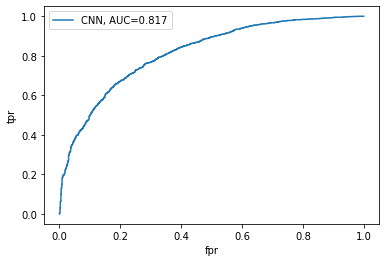

In [24]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


plt.plot(fpr_keras, tpr_keras,label='CNN, AUC={:.3f}'.format(auc_keras))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

plt.savefig('roc.pdf')
print(auc_keras)

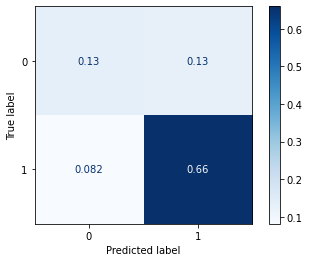

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=CM)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('confusion_matrix.pdf')
plt.show()

In [34]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.pdf', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [33]:
tensorflow.keras.utils.plot_model(model, to_file='Model1.png')

NameError: name 'tensorflow' is not defined